# Clothing Retail Data Analysis

---

Our clothing retail company sells and ships a variety of products to customers around the globe.

When performing Clothing Retail Data Analysis, the goal is typically to gain insights that can drive sales, optimize inventory management, improve customer experience, and guide strategic decisions. 

We have been tasked by the manager to help senior management better understand the key drivers of the business. 

To achieve this, we will:

• Import and explore the data extracts available to you

• Combine, clean, and transform this information so it is ready for analysis and visualization

• Analyze key metrics of the business for Stores, Products, and Orders

• Visualize insights to help drive better communication and decision making

## Preparing Data for Analysis

Load, explore, clean, and transform data to be ready for analysis and visualization with the aim to build a single, clean DataFrame that allows us to dig into store, product, and order information


In [1]:
import pandas as pd
import numpy as np

---
## Load Data
---




### 1. Import .csv source files into Pandas dataframes.

In [2]:
# Import Products.csv and create products_df
products_df = pd.read_csv('Products.csv')

# Import Shipping.csv and create shipping_df
shipping_df = pd.read_csv('Shipping.csv')

# Import Stores.csv and create stores_df1
stores_df1 =  pd.read_csv('Stores.csv')

# Import Transactions.csv and create transactions_df
transactions_df =  pd.read_csv('Transactions.csv')

In [4]:
products_df.head()

,ProductID,Name,Price,Cost
0,1,"Sweater,Blue",30,10
1,2,"Sweater,Black",35,10
2,3,"Sweater,White",30,10
3,4,"Hoodie,Black",40,15
4,5,"Hoodie,White",35,15


In [12]:
shipping_df.head()

,OrderID,City,ShippingMethod
0,1.0,Vancouver,Standard
1,2.0,Los Angeles,Expedited
2,3.0,Burnaby,Standard
3,4.0,Vancouver,Standard
4,5.0,Los Angeles,Standard


In [9]:
stores_df1.head()

,StoreID,City
0,NaN,Surrey
1,NaN,Langley
2,NaN,Vancouver
3,NaN,Burnaby
4,NaN,Los Angeles


In [7]:
transactions_df.head()

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID
0,3,2019,1,2,2,1,1
1,8,2019,1,6,3,2,2
2,1,2019,1,6,1,3,3
3,8,2019,1,9,4,4,4
4,1,2019,1,12,2,5,5


### 2. Check for null values in the four dataframes.

Check for null values in each of the data frames. Consider how we can most efficiently accomplish this task,
reducing the redundancy in our code.


In [10]:
# Create files list containing the four dataframes
files = [products_df, shipping_df, stores_df1, transactions_df]

# Loop through the files list and print the sum of null values
for i in files:
    print(i.isnull().sum())

ProductID    0
Name         0
Price        0
Cost         0
dtype: int64
OrderID           0
City              0
ShippingMethod    9
dtype: int64
StoreID    10
City        0
dtype: int64
ProductID    0
Year         0
Month        0
Day          0
Quantity     0
OrderLine    0
OrderID      0
dtype: int64


### 3. Fill in the null values of the StoreID column.

In [13]:
# Print stores_df1
stores_df1

,StoreID,City
0,NaN,Surrey
1,NaN,Langley
2,NaN,Vancouver
3,NaN,Burnaby
4,NaN,Los Angeles
5,NaN,New York
6,NaN,Portland
7,NaN,Utah
8,NaN,Seattle
9,NaN,Kelowna


After identifying the null values, we are going to fill the values with new data. 

Assume that any unique identifiers should be sequential starting from 1 and unknown Shipping information can be considered ‘Expedited’.

In [14]:
# Create a list of sequential numbers from 1 to 10
storeIDs= list(range(1,11))

# Create a for loop that assigns each of the items from the list to the StoreID column of stores_df1
for i in stores_df1.index:
    stores_df1['StoreID'][i] = storeIDs[i]

/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_39056/4164129375.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stores_df1['StoreID'][i] = storeIDs[i]
/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_39056/416412937

In [15]:
# Print stores_df1 to check the results of the for loop
stores_df1

,StoreID,City
0,1.0,Surrey
1,2.0,Langley
2,3.0,Vancouver
3,4.0,Burnaby
4,5.0,Los Angeles
5,6.0,New York
6,7.0,Portland
7,8.0,Utah
8,9.0,Seattle
9,10.0,Kelowna


### 4. Fill in the null values of the ShippingMethod column with 'Expedited'.


In [17]:
# Identify the unique values and count of rows in the ShippingMethod column
shipping_df['ShippingMethod'].value_counts(dropna= False)

ShippingMethod
Standard     535
Expedited     55
Nextday       55
NaN            9
Name: count, dtype: int64

In [18]:
# Fill the na values with 'Expediated'
shipping_df['ShippingMethod'] = shipping_df['ShippingMethod'].fillna('Expedited')

In [19]:
# Check the unique values and counts
shipping_df['ShippingMethod'].value_counts(dropna= False)

ShippingMethod
Standard     535
Expedited     64
Nextday       55
Name: count, dtype: int64

---
## Clean Data
---

Now that we have identified and dealt with missing values, we need to continue to clean and modify our
data. We will need to add some additional information, as well as combine the data frames to be in a usable
format.
- Create a new data frame: “stores_df2” which will contain StoreIDs 11-15 and the Cities of Seoul, Tokyo,
Denver, Miami, and San Diego.
- Combine the two store data frames to create “stores_df”. 
- Identify and drop any duplicate rows from transactions_df.

### 5. Create stores_df2 dataframe from a dictionary containing two lists.

In [20]:
# Create and print storeIDs and cities lists
storeIDs2 = list(range(11,16))
cities = ['Seoul','Tokyo','Denver','Miami','San Diego']

print(storeIDs2)
print(cities)

[11, 12, 13, 14, 15]
['Seoul', 'Tokyo', 'Denver', 'Miami', 'San Diego']


In [22]:
# Create and print stores_dict dictionary with the storeIDs and cities lists
stores_dict = {'StoreID': storeIDs2,
              'City': cities}

stores_dict

{'StoreID': [11, 12, 13, 14, 15],
 'City': ['Seoul', 'Tokyo', 'Denver', 'Miami', 'San Diego']}

In [23]:
# Create and print stores_df2 dataframe from the stores_dict dictionary
stores_df2 = pd.DataFrame(data=stores_dict)
stores_df2

,StoreID,City
0,11,Seoul
1,12,Tokyo
2,13,Denver
3,14,Miami
4,15,San Diego


### 6. Concatenate stores_df1 and stores_df2 to create store_df.

In [24]:
# Create stores_df by concatenating the stores_df1 and stores_df2 dataframes
stores_df = pd.concat([stores_df1, stores_df2]).reset_index().drop('index', axis = 1)

In [25]:
# Print stores_df to check the results of the concatenation
stores_df

,StoreID,City
0,1.0,Surrey
1,2.0,Langley
2,3.0,Vancouver
3,4.0,Burnaby
4,5.0,Los Angeles
5,6.0,New York
6,7.0,Portland
7,8.0,Utah
8,9.0,Seattle
9,10.0,Kelowna


### 7. Identify and drop duplicate rows from transactions_df.

In [33]:
# Identify duplicate rows in transactions_df
transactions_df[transactions_df.duplicated()]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID


In [34]:
# Drop duplicate rows in transactions_df
transactions_df = transactions_df.drop_duplicates()

In [35]:
# Print transactions_df to check the results of dropping duplicates
transactions_df[transactions_df.duplicated()]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID


### 8. Modify the column data types in shipping_df & transactions_df.

Identify the column datatypes in shipping_df and transactions_df. Then, modify OrderID in shipping_df to an
integer and modify the Year, Month, and Day columns in transactions_df to a string.



In [36]:
# Identify the data types in shipping_df & transactions_df
shipping_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderID         654 non-null    int64 
 1   City            654 non-null    object
 2   ShippingMethod  654 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, 0 to 660
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductID  654 non-null    int64 
 1   Year       654 non-null    object
 2   Month      654 non-null    object
 3   Day        654 non-null    object
 4   Quantity   654 non-null    int64 
 5   OrderLine  654 non-null    int64 
 6   OrderID    654 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 40.9+ KB


In [37]:
# Change the data type of OrderID to integer
shipping_df['OrderID'] = shipping_df['OrderID'].astype('int')

In [38]:
# Change the data type of Year, Month, and Day to string
transactions_df['Year'] = transactions_df['Year'].astype('str')
transactions_df['Month'] = transactions_df['Month'].astype('str')
transactions_df['Day'] = transactions_df['Day'].astype('str')

In [39]:
# Print shipping_df & transactions_df to check the results of the change in data type
shipping_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderID         654 non-null    int64 
 1   City            654 non-null    object
 2   ShippingMethod  654 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, 0 to 660
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductID  654 non-null    int64 
 1   Year       654 non-null    object
 2   Month      654 non-null    object
 3   Day        654 non-null    object
 4   Quantity   654 non-null    int64 
 5   OrderLine  654 non-null    int64 
 6   OrderID    654 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 40.9+ KB


### 9. Split the Name column into two columns: Type and Colour.

In [31]:
# View the top 5 rows of products_df
products_df.head()

,ProductID,Name,Price,Cost
0,1,"Sweater,Blue",30,10
1,2,"Sweater,Black",35,10
2,3,"Sweater,White",30,10
3,4,"Hoodie,Black",40,15
4,5,"Hoodie,White",35,15
5,6,"Hoodie,Gray",35,15
6,7,"T-shirt,White",15,2
7,8,"T-shirt,Black",20,2
8,9,"T-shirt,Grey",15,2
9,10,"T-shirt,Blue",15,2


In [40]:
# Create Type and Colour columns by splitting the Name column
products_df['Type'] = products_df['Name'].str.split(',', expand=True)[0]
products_df['Colour'] = products_df['Name'].str.split(',', expand=True)[1]

In [41]:
# Print the top 5 rows of products_df to check the new columns
products_df.head()

,ProductID,Name,Price,Cost,Type,Colour
0,1,"Sweater,Blue",30,10,Sweater,Blue
1,2,"Sweater,Black",35,10,Sweater,Black
2,3,"Sweater,White",30,10,Sweater,White
3,4,"Hoodie,Black",40,15,Hoodie,Black
4,5,"Hoodie,White",35,15,Hoodie,White


### 10. Replace the 'Gray' values of the Colour column with 'Grey'.

In [42]:
# Identify the unique values of Colour
products_df['Colour'].unique()

array(['Blue', 'Black', 'White', 'Gray', 'Grey', 'Green', 'Red'],
      dtype=object)

In [43]:
# Replace the values of 'Gray' with 'Grey'
products_df['Colour'] = products_df['Colour'].str.replace('Gray', 'Grey')

In [44]:
# Review the new unique values of Colour
products_df['Colour'].unique()

array(['Blue', 'Black', 'White', 'Grey', 'Green', 'Red'], dtype=object)

---
## Transform Data
---

We need to combine our data frames and create some additional columns. This will provide the basis of our
analysis and visualization.

### 11. Create orders_df by merging transactions_df, products_df, shipping_df, and stores_df.

In [45]:
# Merge transactions_df & products_df - returning all matching rows to the transactions_df
order_df = pd.merge(transactions_df, products_df, on ='ProductID', how = 'left')

# Merge shipping_df & stores_df - returning only matching rows in both dataframes
shipping_stores_df = pd.merge(shipping_df, stores_df, on = 'City', how ='inner')

# Merge orders_df & shipping_stores_df - returning only matching rows from the shipping_stores_df
orders_df = pd.merge(order_df, shipping_stores_df, on = 'OrderID', how = 'right')

In [46]:
# Print orders_df to inspect the new dataframe
orders_df

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,Type,Colour,City,ShippingMethod,StoreID
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,Sweater,White,Vancouver,Standard,3.0
1,8,2019,1,6,3,2,2,"T-shirt,Black",20,2,T-shirt,Black,Los Angeles,Expedited,5.0
2,1,2019,1,6,1,3,3,"Sweater,Blue",30,10,Sweater,Blue,Burnaby,Standard,4.0
3,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,T-shirt,Black,Vancouver,Standard,3.0
4,1,2019,1,12,2,5,5,"Sweater,Blue",30,10,Sweater,Blue,Los Angeles,Standard,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,13,2022,7,9,1,650,650,"Socks,Grey",10,1,Socks,Grey,Langley,Standard,2.0
599,5,2022,7,31,3,651,651,"Hoodie,White",35,15,Hoodie,White,Langley,Standard,2.0
600,7,2022,9,3,1,652,652,"T-shirt,White",15,2,T-shirt,White,Langley,Standard,2.0
601,7,2022,10,29,2,653,653,"T-shirt,White",15,2,T-shirt,White,Langley,Standard,2.0


### 12. Create a new column, Date, from the Year, Month, and Day columns in orders_df .

In [47]:
# Create Date column
orders_df['Date'] = orders_df['Year'] +'-'+ orders_df['Month'] +'-'+ orders_df['Day']

# Set the data type to 'datetime64[ns]'
orders_df['Date'] = orders_df['Date'].astype('datetime64[ns]')

In [48]:
# Inspect orders_df to check the new column
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ProductID       603 non-null    int64         
 1   Year            603 non-null    object        
 2   Month           603 non-null    object        
 3   Day             603 non-null    object        
 4   Quantity        603 non-null    int64         
 5   OrderLine       603 non-null    int64         
 6   OrderID         603 non-null    int64         
 7   Name            603 non-null    object        
 8   Price           603 non-null    int64         
 9   Cost            603 non-null    int64         
 10  Type            603 non-null    object        
 11  Colour          603 non-null    object        
 12  City            603 non-null    object        
 13  ShippingMethod  603 non-null    object        
 14  StoreID         603 non-null    float64       
 15  Date  

### 13. Create a new column, Discount Pct, indicating a 30% discount for an order of socks that are green or grey

In [51]:
# Create Discount Pct column
orders_df['Discount Pct'] = np.where(
(
    (orders_df['Type'] == 'Socks') & 
    ((orders_df['Colour'] == 'Green') | (orders_df['Colour'] == 'Grey'))
)
    , 30, 0)

In [52]:
# Print orders_df where the rows have a Type of 'Socks'
orders_df[(orders_df['Type'] == 'Socks')]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,Type,Colour,City,ShippingMethod,StoreID,Date,Discount Pct
8,14,2019,1,28,5,9,9,"Socks,Green",10,1,Socks,Green,Burnaby,Standard,4.0,2019-01-28,30
10,11,2019,1,31,3,11,11,"Socks,White",10,1,Socks,White,New York,Standard,6.0,2019-01-31,0
18,11,2019,2,12,1,19,19,"Socks,White",10,1,Socks,White,Burnaby,Standard,4.0,2019-02-12,0
25,13,2019,2,27,2,26,26,"Socks,Grey",10,1,Socks,Grey,Langley,Standard,2.0,2019-02-27,30
62,13,2019,5,26,4,63,63,"Socks,Grey",10,1,Socks,Grey,Seoul,Standard,11.0,2019-05-26,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,13,2021,2,7,5,617,617,"Socks,Grey",10,1,Socks,Grey,Langley,Standard,2.0,2021-02-07,30
568,14,2021,3,6,3,620,620,"Socks,Green",10,1,Socks,Green,Langley,Standard,2.0,2021-03-06,30
572,12,2021,4,21,2,624,624,"Socks,Black",15,1,Socks,Black,Langley,Standard,2.0,2021-04-21,0
587,14,2021,10,17,5,639,639,"Socks,Green",10,1,Socks,Green,Langley,Standard,2.0,2021-10-17,30


### 14. Create five new columns in orders_df.

Create five new metric columns in orders_df:

• Sale Price = Calculate the Sale Price of an order after the Discount Pct has been applied to the Price

• Net Profit = Sale Price - Cost

• Total Revenue = Sale Price * Quantity

• Total Cost = Cost * Quantity

• Total Net Profit = Total Revenue - Total Cost

In [54]:
# Create Sale Price, calculating the price after a discount has been applied
orders_df['Sale Price'] = orders_df['Price']*(100-orders_df['Discount Pct'])/100

In [55]:
# Create Net Profit, calculating the difference between the Sale Price and Cost
orders_df['Net Profit'] = orders_df['Sale Price']-orders_df['Cost']

In [56]:
# Create Total Revenue, calculating the Sale Price by Quantity
orders_df['Total Revenue'] = orders_df['Sale Price']*orders_df['Quantity']

In [57]:
# Create Total Cost, calculating the Cost by Quantity
orders_df['Total Cost'] = orders_df['Cost']*orders_df['Quantity']

In [58]:
# Create Total Net Profit, calculating the difference between Total Revenue and Total Cost
orders_df['Total Net Profit'] = orders_df['Total Revenue'] - orders_df['Total Cost'] 

In [59]:
# Print orders_df to check the new columns
orders_df.head()

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,...,Vancouver,Standard,3.0,2019-01-02,0,30.0,20.0,60.0,20,40.0
1,8,2019,1,6,3,2,2,"T-shirt,Black",20,2,...,Los Angeles,Expedited,5.0,2019-01-06,0,20.0,18.0,60.0,6,54.0
2,1,2019,1,6,1,3,3,"Sweater,Blue",30,10,...,Burnaby,Standard,4.0,2019-01-06,0,30.0,20.0,30.0,10,20.0
3,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,...,Vancouver,Standard,3.0,2019-01-09,0,20.0,18.0,80.0,8,72.0
4,1,2019,1,12,2,5,5,"Sweater,Blue",30,10,...,Los Angeles,Standard,5.0,2019-01-12,0,30.0,20.0,60.0,20,40.0


## Analyze & Visualize Data

The goal af the analysis is to dig deeper into the store, product, and order information of our company in order to generate insights from orders_df to help our senior management team.

## Store Metrics


1. The transactions for a Store 1 in 2019.
2. The average Total Net Profit across all stores.
3. The number of orders for each Store and City.
4. The Total Cost by Store in descending order.
5. The Total Revenue in 2019 by store.
6. The StoreID and City with the highest and lowest Total Revenue.


### 1. Filter orders_df to return rows from 2019 for Store 1.

In [60]:
# Define the filter condition on the Year and StoreID columns
year_city_filter = (orders_df['Year'] == '2019') & (orders_df['StoreID'] == 1)

# Apply the filter condition to orders_df
orders_df[year_city_filter]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
5,10,2019,1,12,4,5,6,"T-shirt,Blue",15,2,...,Surrey,Standard,1.0,2019-01-12,0,15.0,13.0,60.0,8,52.0
14,9,2019,2,8,4,15,15,"T-shirt,Grey",15,2,...,Surrey,Standard,1.0,2019-02-08,0,15.0,13.0,60.0,8,52.0
17,7,2019,2,12,1,18,18,"T-shirt,White",15,2,...,Surrey,Standard,1.0,2019-02-12,0,15.0,13.0,15.0,2,13.0
21,8,2019,2,18,3,22,22,"T-shirt,Black",20,2,...,Surrey,Standard,1.0,2019-02-18,0,20.0,18.0,60.0,6,54.0
30,4,2019,3,16,3,31,31,"Hoodie,Black",40,15,...,Surrey,Standard,1.0,2019-03-16,0,40.0,25.0,120.0,45,75.0
33,8,2019,3,27,4,34,34,"T-shirt,Black",20,2,...,Surrey,Standard,1.0,2019-03-27,0,20.0,18.0,80.0,8,72.0
36,9,2019,4,2,2,37,37,"T-shirt,Grey",15,2,...,Surrey,Expedited,1.0,2019-04-02,0,15.0,13.0,30.0,4,26.0
37,6,2019,4,2,1,37,38,"Hoodie,Gray",35,15,...,Surrey,Nextday,1.0,2019-04-02,0,35.0,20.0,35.0,15,20.0
39,1,2019,4,9,4,40,40,"Sweater,Blue",30,10,...,Surrey,Standard,1.0,2019-04-09,0,30.0,20.0,120.0,40,80.0
47,8,2019,4,17,3,48,48,"T-shirt,Black",20,2,...,Surrey,Standard,1.0,2019-04-17,0,20.0,18.0,60.0,6,54.0


### 2. Compute the average Total Net Profit across the stores

In [61]:
# Calculate the Total Net Profit by StoreID
store_profit_df = orders_df.groupby(by='StoreID').sum('Total Net Profit')

# Calculate the average Total Net Profit
store_profit_df['Total Net Profit'].mean()

2709.0833333333335

### 3. Return the number of orders for each Store and City

In [62]:
orders_df[['StoreID','City','OrderID']].groupby(by=['StoreID','City']).count()

,,OrderID
StoreID,City,
1.0,Surrey,130
2.0,Langley,73
3.0,Vancouver,165
4.0,Burnaby,139
5.0,Los Angeles,16
6.0,New York,14
7.0,Portland,15
9.0,Seattle,12
10.0,Kelowna,10


### 4. Return the Total Cost by Store in descending order

In [63]:
# Calculate the Total Cost by StoreID
store_cost_df = orders_df[['StoreID','Total Cost']].groupby(by=['StoreID']).sum()

# Sort the values by Total Cost in descending order
store_cost_df.sort_values('Total Cost', ascending = False)

,Total Cost
StoreID,
3.0,3365
4.0,3314
1.0,2779
2.0,1677
6.0,425
10.0,388
5.0,275
7.0,272
12.0,248


### 5. Return the Total Revenue in the Year 2019 for each StoreID

In [64]:
# Filter Year to 2019
y2019_df = orders_df[orders_df['Year'] == '2019']

# Return Total Revenue by StoreID and City
y2019_df[['StoreID','Total Revenue']].groupby(by='StoreID').sum()

,Total Revenue
StoreID,
1.0,2383.0
2.0,1440.0
3.0,2960.0
4.0,2965.0
5.0,319.0
6.0,395.0
7.0,355.0
9.0,502.0
10.0,505.0


### 6.  Return the StoreID and City with the highest and lowest Total Revenue

In [65]:
# Calculate Total Revenue for each StoreID and City
store_revenue_df = orders_df[['StoreID','City','Total Revenue']].groupby(by=['StoreID','City']).sum()

# Calculate the maximum and minimum Total Revenue
max_revenue = store_revenue_df['Total Revenue'] == store_revenue_df['Total Revenue'].max()
min_revenue = store_revenue_df['Total Revenue'] == store_revenue_df['Total Revenue'].min()

# Return the StoreID and City with the maximum or minimum Total Revenue
store_revenue_df[max_revenue | min_revenue]

,,Total Revenue
StoreID,City,
3.0,Vancouver,12105.0
11.0,Seoul,244.0


## Product Metrics

1. The number of black t-shirts sold.
2. The product that has the highest Total Revenue to Total Cost Ratio - the product that generates the most revenue
per cost.
3. The top five products by Total Revenue and the top five products by Total Net Profit. 


### 7. How many Black T-shirts were sold?

In [66]:
orders_df[orders_df['Name'] == 'T-shirt,Black']['Quantity'].sum()

286

### 8. Which product has the highest Total Revenue to Total Cost Ratio?

In [67]:
# Calculate Total Revenue and Total Cost by ProductID
product_revenue_cost_df = orders_df[['ProductID', 'Total Revenue','Total Cost']].groupby(by='ProductID').sum()

# Calculate the Revenue Cost Ratio
product_revenue_cost_df['Revenue_Cost_Ratio'] = product_revenue_cost_df['Total Revenue'] / product_revenue_cost_df['Total Cost']

# Calculate the maximum Revenue Cost Ratio
max_revenue_cost_ratio = product_revenue_cost_df['Revenue_Cost_Ratio'] == product_revenue_cost_df['Revenue_Cost_Ratio'].max()

# Return the ProductID with the maximum Revenue Cost Ratio
product_revenue_cost_df[max_revenue_cost_ratio]

,Total Revenue,Total Cost,Revenue_Cost_Ratio
ProductID,,,
12,585.0,39,15.0


### 9. Which five products have the highest Total Revenue?  Which five products have the highest Total Net Profit? Are they the same five products for both metrics?

In [68]:
# Calculate Total Revenue and Total Net Profit by ProductID
product_revenue_profit_df = orders_df[['ProductID', 'Total Revenue','Total Net Profit']].groupby(by='ProductID').sum()

In [69]:
# Return the five ProductIDs with the highest Total Revenue
product_revenue_profit_df.sort_values(by='Total Revenue', ascending = False).head()

,Total Revenue,Total Net Profit
ProductID,,
8,5720.0,5148.0
7,4440.0,3848.0
5,4305.0,2460.0
2,3605.0,2575.0
4,3480.0,2175.0


In [70]:
# Return the five ProductIDs with the highest Total Net Profit
product_revenue_profit_df.sort_values(by='Total Net Profit', ascending = False).head()

,Total Revenue,Total Net Profit
ProductID,,
8,5720.0,5148.0
7,4440.0,3848.0
2,3605.0,2575.0
5,4305.0,2460.0
4,3480.0,2175.0


In [71]:
# Create a new dataframe and set in the index of the five ProductIds with the highest Total Revenue
total_revenue_index = product_revenue_profit_df.sort_values(by='Total Revenue', ascending = False).head().index

# Create a new dataframe and set in the index of the five ProductIds with the highest Total Net Profit
total_net_profit_index = product_revenue_profit_df.sort_values(by='Total Net Profit', ascending = False).head().index

# Compare the two dataframes to see if the top 5 products are the same for both metrics
(total_revenue_index == total_net_profit_index).sum() 

3

## Order Metrics

1. The first 200 transactions from orders_df.
2. The Total Net Profit for a specific row in orders_df.
3. The number of orders from Store 7.
4. The number of orders containing multiple products.
5. The mean Quantity for each combination of Colour and City in ascending order.

### 10. Return the first 200 rows from orders_df

In [72]:
orders_df.iloc[:200]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,...,Vancouver,Standard,3.0,2019-01-02,0,30.0,20.0,60.0,20,40.0
1,8,2019,1,6,3,2,2,"T-shirt,Black",20,2,...,Los Angeles,Expedited,5.0,2019-01-06,0,20.0,18.0,60.0,6,54.0
2,1,2019,1,6,1,3,3,"Sweater,Blue",30,10,...,Burnaby,Standard,4.0,2019-01-06,0,30.0,20.0,30.0,10,20.0
3,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,...,Vancouver,Standard,3.0,2019-01-09,0,20.0,18.0,80.0,8,72.0
4,1,2019,1,12,2,5,5,"Sweater,Blue",30,10,...,Los Angeles,Standard,5.0,2019-01-12,0,30.0,20.0,60.0,20,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8,2020,5,27,2,199,199,"T-shirt,Black",20,2,...,Vancouver,Expedited,3.0,2020-05-27,0,20.0,18.0,40.0,4,36.0
196,6,2020,5,27,5,199,200,"Hoodie,Gray",35,15,...,Burnaby,Standard,4.0,2020-05-27,0,35.0,20.0,175.0,75,100.0
197,14,2020,5,27,5,201,201,"Socks,Green",10,1,...,Vancouver,Standard,3.0,2020-05-27,30,7.0,6.0,35.0,5,30.0
198,8,2020,5,29,1,202,202,"T-shirt,Black",20,2,...,Langley,Expedited,2.0,2020-05-29,0,20.0,18.0,20.0,2,18.0


### 11. What is the Total Net Profit for row 500 in orders_df?

In [76]:
orders_df.head()

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,...,Vancouver,Standard,3.0,2019-01-02,0,30.0,20.0,60.0,20,40.0
1,8,2019,1,6,3,2,2,"T-shirt,Black",20,2,...,Los Angeles,Expedited,5.0,2019-01-06,0,20.0,18.0,60.0,6,54.0
2,1,2019,1,6,1,3,3,"Sweater,Blue",30,10,...,Burnaby,Standard,4.0,2019-01-06,0,30.0,20.0,30.0,10,20.0
3,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,...,Vancouver,Standard,3.0,2019-01-09,0,20.0,18.0,80.0,8,72.0
4,1,2019,1,12,2,5,5,"Sweater,Blue",30,10,...,Los Angeles,Standard,5.0,2019-01-12,0,30.0,20.0,60.0,20,40.0


In [77]:
orders_df.tail()

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
598,13,2022,7,9,1,650,650,"Socks,Grey",10,1,...,Langley,Standard,2.0,2022-07-09,30,7.0,6.0,7.0,1,6.0
599,5,2022,7,31,3,651,651,"Hoodie,White",35,15,...,Langley,Standard,2.0,2022-07-31,0,35.0,20.0,105.0,45,60.0
600,7,2022,9,3,1,652,652,"T-shirt,White",15,2,...,Langley,Standard,2.0,2022-09-03,0,15.0,13.0,15.0,2,13.0
601,7,2022,10,29,2,653,653,"T-shirt,White",15,2,...,Langley,Standard,2.0,2022-10-29,0,15.0,13.0,30.0,4,26.0
602,7,2022,12,3,1,654,654,"T-shirt,White",15,2,...,Langley,Standard,2.0,2022-12-03,0,15.0,13.0,15.0,2,13.0


In [78]:
orders_df.loc[499,'Total Net Profit']

70.0

### 12. How many orders are from StoreID 7?

In [79]:
# Calculate the orders from StoreID 7
store7_orders_df = orders_df[orders_df['StoreID'] == 7]

# Count the number of orders
store7_orders_df['OrderID'].count()

15

### 13. How many orders contain multiple products?

In [80]:
# Calculate the count of orderlines
orderID_count = orders_df['OrderLine'].value_counts()

# Return the number of orders with more than one product
orderID_count[orderID_count > 1].count()

36

### 14. Return the mean Quantity for each combination of Colour and City in ascending order. 

In [81]:
# Calculate the mean Quantity by Colour and City
colour_city_quantity_df = orders_df[['Colour','City', 'Quantity']].groupby(['Colour','City']).mean()

# Return the mean Quantity values in ascending order
colour_city_quantity_df.sort_values(by='Quantity')

Quantity
Colour City                 
Green  Seattle      1.000000
       Los Angeles  1.000000
       Portland     1.666667
       New York     2.000000
Grey   Kelowna      2.000000
       San Diego    2.000000
White  Portland     2.250000
Black  New York     2.400000
Grey   Portland     2.500000
Green  Vancouver    2.571429
White  Tokyo        2.600000
Black  Kelowna      2.600000
Blue   Los Angeles  2.666667
White  Los Angeles  2.666667
Blue   Surrey       2.666667
       Seoul        2.666667
Grey   Vancouver    2.680000
Black  Surrey       2.756098
       Los Angeles  2.857143
Blue   Vancouver    2.928571
Grey   Surrey       2.935484
White  Langley      2.952381
       Surrey       2.965517
Red    Surrey       3.000000
White  Seattle      3.000000
Red    Burnaby      3.000000
Grey   Seoul        3.000000
Red    Kelowna      3.000000
Black  Burnaby      3.000000
Blue   Burnaby      3.000000
Black  San Diego    3.000000
       Tokyo        3.000000
Blue   Langley      3.000000
       Seattle      3.000000
White  Vancouver    3.030303
Black  Langley      3.055556
Grey   Burnaby      3.071429
       Langley      3.076923
White  Burnaby      3.115385
Green  Surrey       3.200000
White  New York     3.200000
Black  Vancouver    3.295455
Blue   Portland     3.333333
Green  Langley      3.375000
White  San Diego    3.400000
Grey   Los Angeles  3.500000
Black  Seattle      3.571429
Green  San Diego    3.666667
       Burnaby      3.833333
Grey   Tokyo        4.000000
       Seattle      4.000000
Blue   Tokyo        4.000000
White  Kelowna      4.000000
Black  Portland     4.333333
Red    Vancouver    4.500000
       New York     5.000000
Green  Kelowna      5.000000
Blue   New York     5.000000

## Visualize Data

With the use of visuals, we can more easily analyze key performance metrics and identify trends and outliers.
When creating visuals, consider the structure of the source data, the type of visuals that best suit the data,
and how we can format the plots with labels and other options.

In [82]:
# Import the seaborn and matplotlib pyplot packages
import seaborn as sns
import matplotlib.pyplot as plt

### 15. Create a bar plot that shows the Quanitity sold of each ProductID

Text(0.5, 1.0, 'Quantity Sold by Product')

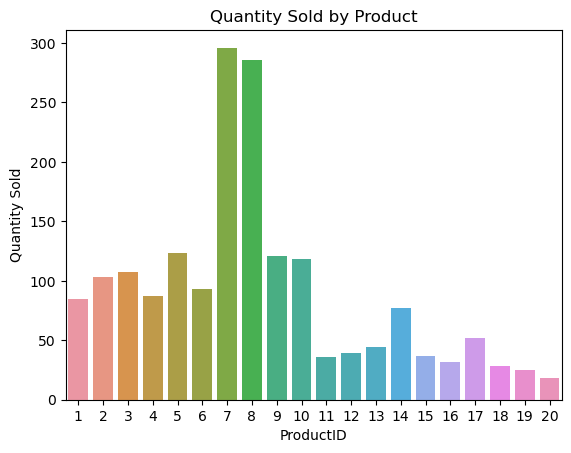

In [84]:
# Calculate the total Quantity by ProductID
product_quantity_df = orders_df[['ProductID', 'Quantity']].groupby(by='ProductID').sum().reset_index()

# Create the barplot
sns.barplot(data =product_quantity_df, 
            x= 'ProductID', 
            y= 'Quantity' )

plt.xlabel("ProductID")
plt.ylabel("Quantity Sold")
plt.title("Quantity Sold by Product")

### 16. Create a scatterplot that plots Total Revenue and Total Cost. The scatterplot should include:
* hue that indicates the Total Net Profit of the order
* a horizontal line that indicates the mean Total Revenue for comparison
* all relevant labels to the plot and axis

Text(0.5, 1.0, 'Total Revenue vs Total Cost')

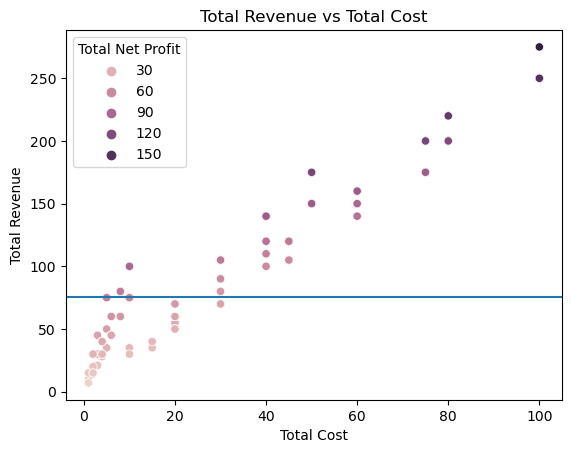

In [85]:
sns.scatterplot(data=orders_df, 
            x='Total Cost', 
            y='Total Revenue',
            hue='Total Net Profit')

plt.axhline(y=np.nanmean(orders_df['Total Revenue']))
plt.xlabel("Total Cost")
plt.ylabel("Total Revenue")
plt.title("Total Revenue vs Total Cost")

### 17. Create a horizontal barplot that shows the average Discount Pct for each City

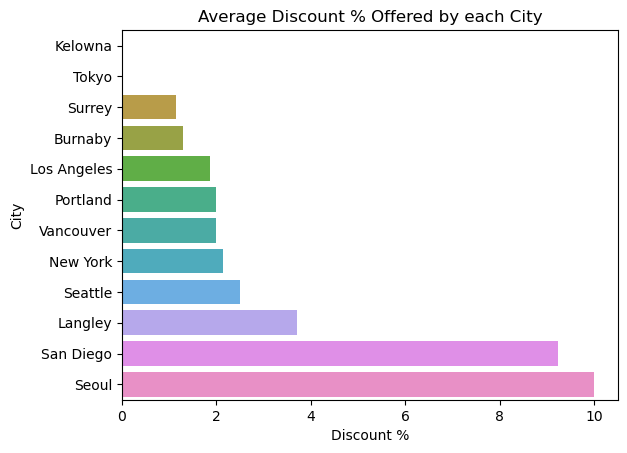

In [86]:
# Calculate the average Discount Pct by City. Sort the values by Discount Pct
city_discount_df = orders_df[['City','Discount Pct']].groupby(by='City').mean().sort_values(by='Discount Pct').reset_index()

# Create the barplot
sns.barplot(data=city_discount_df, 
            y='City', 
            x='Discount Pct', 
            orient='h') 

plt.xlabel("Discount %")
plt.ylabel("City")
plt.title("Average Discount % Offered by each City");

### 18. Create a lineplot that shows the Total Net Profit by Date

/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Total Net Profit')

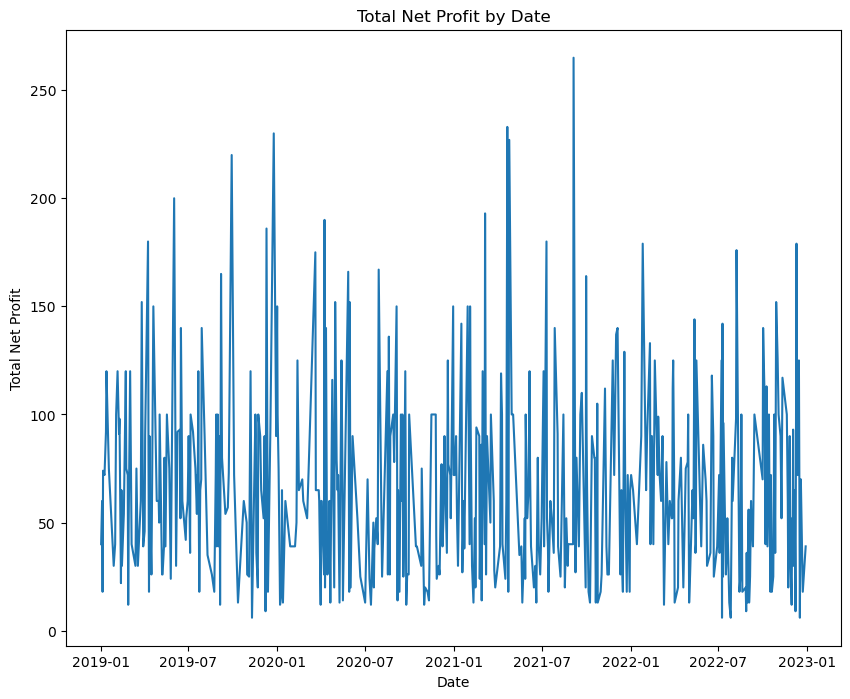

In [87]:
# Calculate Total Net Profit by Date
date_profit_df = orders_df[['Date','Total Net Profit']].groupby(by='Date').sum()

# Set the plot area
plt.figure(figsize=(10, 8))

# Create the lineplot
sns.lineplot(data = date_profit_df,
             x='Date',
             y='Total Net Profit')

plt.title("Total Net Profit by Date")
plt.xlabel("Date")
plt.ylabel("Total Net Profit")

### 19. Create a heatmap to visualize the correlation of columns in order_df

<Axes: >

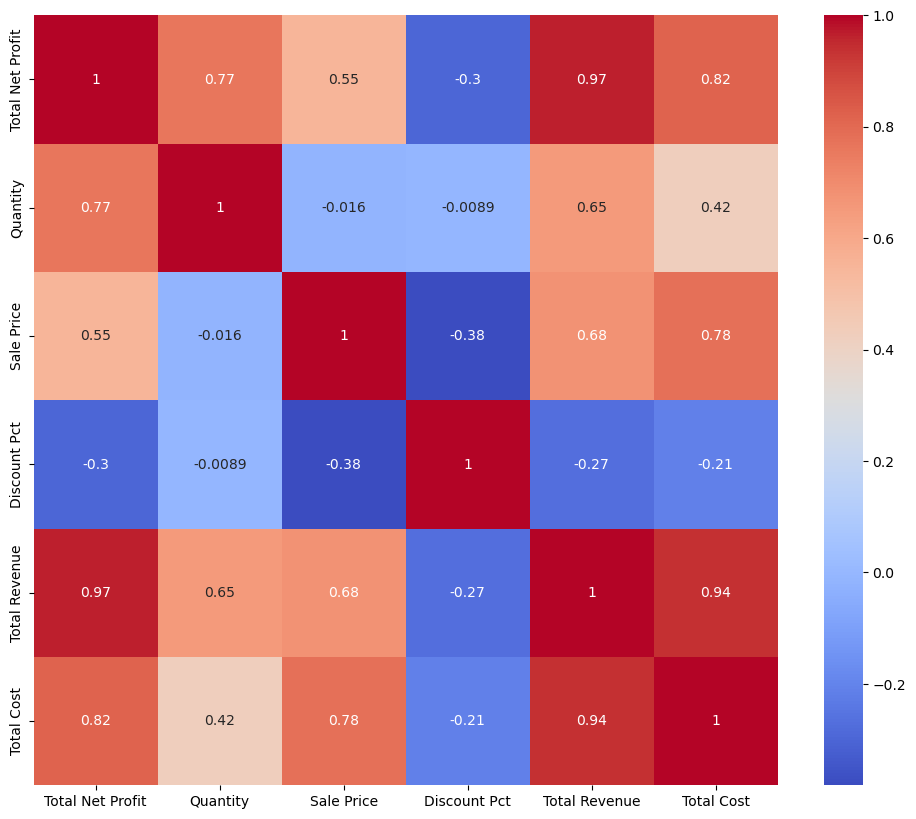

In [88]:
# Define the columns to include in correlation
corr_df = orders_df[['Total Net Profit', 'Quantity', 'Sale Price', 'Discount Pct','Total Revenue', 'Total Cost']]

# Calculate the correlation matrix
corr_matrix = corr_df.corr()

# Create the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### 20. Create a boxplot to identify any outliers in Total Revenue for each Type

Text(0, 0.5, 'Quantity')

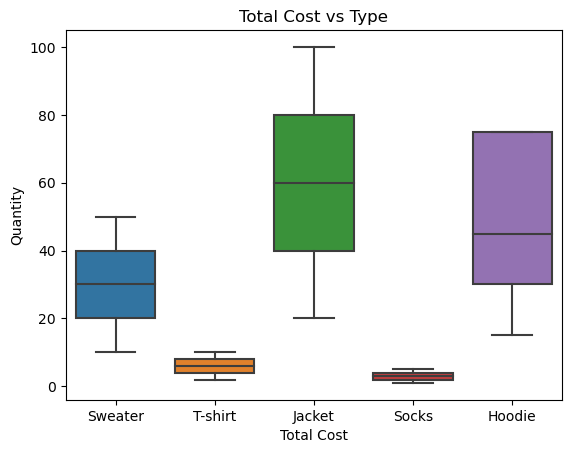

In [89]:
sns.boxplot(data=orders_df, 
            x='Type', 
            y='Total Cost')

plt.title("Total Cost vs Type")
plt.xlabel("Total Cost")
plt.ylabel("Quantity")

### 21. Further explore the outliers identified in the visual and use the IQR rule to return the outlier rows from orders_df.

In [90]:
# Explore the descriptive statistics for the Type that contains the outliers
orders_df[orders_df['Type'] == 'Socks']['Total Revenue'].describe()

count    68.000000
mean     26.352941
std      16.200023
min       7.000000
25%      14.000000
50%      21.000000
75%      31.250000
max      75.000000
Name: Total Revenue, dtype: float64

In [91]:
# Calculate the IQR rule for this type to identify the outlier rows
q3 = 31.35
q1 = 14
IQR = q3 - q1
IQR_rule = 1.5*IQR
socks_df = orders_df[orders_df['Type'] == 'Socks']

# Return the outlier rows
socks_df[socks_df['Total Revenue'] >= (q3 + IQR_rule)]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
79,12,2019,7,6,5,80,80,"Socks,Black",15,1,...,Vancouver,Standard,3.0,2019-07-06,0,15.0,14.0,75.0,5,70.0
207,12,2020,7,6,5,211,211,"Socks,Black",15,1,...,Langley,Standard,2.0,2020-07-06,0,15.0,14.0,75.0,5,70.0
453,12,2022,6,5,5,499,499,"Socks,Black",15,1,...,Vancouver,Standard,3.0,2022-06-05,0,15.0,14.0,75.0,5,70.0
547,12,2022,12,19,5,599,599,"Socks,Black",15,1,...,Langley,Standard,2.0,2022-12-19,0,15.0,14.0,75.0,5,70.0
